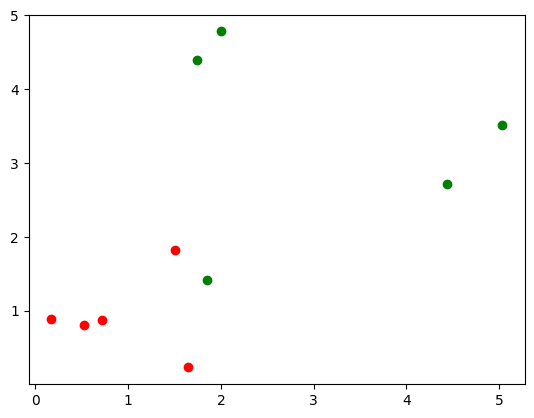

epoch: 0, error: -0.2073987968510736
epoch: 1, error: -0.2112189567733163
epoch: 2, error: -0.21326187108972888
epoch: 3, error: -0.21401512078099447
epoch: 4, error: -0.21382650035634881
epoch: 5, error: -0.21294825824420033
epoch: 6, error: -0.2115657597059975
epoch: 7, error: -0.20981661484906958
epoch: 8, error: -0.20780377596538185
epoch: 9, error: -0.2056047054479484
epoch: 10, error: -0.2032779143760579
epoch: 11, error: -0.20086769985186043
epoch: 12, error: -0.1984076227547164
epoch: 13, error: -0.1959230888974027
epoch: 14, error: -0.19343328217171038
epoch: 15, error: -0.19095262324810647
epoch: 16, error: -0.1884918770894362
epoch: 17, error: -0.1860589981177803
epoch: 18, error: -0.18365977788621832
epoch: 19, error: -0.18129834311551288
epoch: 20, error: -0.17897753974463573
epoch: 21, error: -0.17669922975745717
epoch: 22, error: -0.17446452100995344
epoch: 23, error: -0.17227394542712626
epoch: 24, error: -0.17012759730451152
epoch: 25, error: -0.1680252407102233
epoch:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from random import randint
from matplotlib import pyplot as plt
from math import exp,log

x1 = [0.72, 0.17, 1.64, 1.5, 0.52] 
y1 = [0.87, 0.88, 0.23, 1.82, 0.81]
x2 = [1.85, 1.74, 2.0, 5.03, 4.44]
y2 = [1.41, 4.4, 4.78, 3.52, 2.71]

plt.scatter(x=x1, y=y1, color='red')
plt.scatter(x=x2, y=y2, color='green')
plt.show()

inputs = [(x1[i], y1[i]) for i in range(len(x1))]
targets = [0 for i in range(len(x1))]
inputs += [(x2[i], y2[i]) for i in range(len(x2))]
targets += [1 for i in range(len(x2))]

weights = [randint(-100, 100) / 100 for _ in range(3)]

def weighted_z(point):
    z = [item * weights[i] for i, item in enumerate(point)]
    return sum(z) + weights[-1]

def logistic_function(z):
    return 1/(1 + exp(-z))

def logistic_error():
    errors = []

    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if output == 1:
            output = 0.99999

        if output == 0:
            output = 0.00001

        error = -(target * log(output) - (1 - target) * log(1 - output))
        errors.append(error)

    return sum(errors) / len(errors)

lr = 0.15

for epoch in range(200):
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        for j in range(len(weights) - 1):
            weights[j] -= lr * point[j] * (output - target) * (1 / len(inputs))

        weights[-1] -= lr * (output - target) * (1 / len(inputs))

    print(f"epoch: {epoch}, error: {logistic_error()}")

print(weights)

def test():
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]
        print(f"output: {round(output, 2)}, target: {target}")
test()

def accuracy():
    true_outputs = 0

    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if round(output) == target:
            true_outputs += 1

    return true_outputs, len(inputs)

print("accuracy:", accuracy())

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session